# GOOGLE DEVELOPERS STUDENT CLUB RECRUITMENT MODEL BY ARYAN ODUGOUDAR

# IMPORTING THE LIBRARIES

In [216]:

import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


# READING THE DATA

In [217]:

DATA_PATH = "Train.csv"
data = pd.read_csv(DATA_PATH)

# Checking whether the dataset is balanced or not
disease_counts = data["Variant"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})
#plotting correlation matrix
corr = data.corr()
corr



,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,Loss of smell,Nausea,Diarrhea,Misc Symptom 1,Congestion,Sore throat,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Age
ID,1.000000,-0.065077,0.027031,-0.009440,-0.052835,0.042249,0.082516,-0.003630,-0.044243,-0.035091,0.084122,0.045458,0.056244,-0.050679,0.163134,0.053451,-0.052397,-0.000037,0.065914,0.019960
Cough,-0.065077,1.000000,0.298867,0.080428,-0.073539,0.077186,0.071215,0.152401,-0.242958,0.042366,0.107844,0.034185,0.012387,0.039162,-0.007581,0.045215,0.105202,-0.010886,0.096174,-0.019258
Shortness of breath,0.027031,0.298867,1.000000,0.249152,-0.111692,0.226543,0.233624,0.222474,-0.318407,-0.142044,0.262237,0.289616,0.165681,0.246800,0.170773,0.164893,-0.061765,-0.059224,0.190850,0.027938
Fatigue,-0.009440,0.080428,0.249152,1.000000,-0.104900,0.361515,0.270639,-0.048803,-0.152196,-0.346456,0.309640,0.448288,0.340510,0.244528,0.286391,0.397552,-0.362755,-0.109174,0.015589,0.060862
body aches,-0.052835,-0.073539,-0.111692,-0.104900,1.000000,0.175966,-0.052594,-0.114333,0.037918,0.020545,-0.051384,-0.086366,-0.092405,-0.064115,-0.101373,-0.119040,-0.004682,0.806270,0.208147,-0.308825
Headache,0.042249,0.077186,0.226543,0.361515,0.175966,1.000000,0.560573,0.222106,-0.185594,-0.578054,0.433842,0.703599,0.586514,0.399465,0.462602,0.432196,-0.542896,0.131185,0.306573,-0.024244
Loss of taste,0.082516,0.071215,0.233624,0.270639,-0.052594,0.560573,1.000000,0.213221,-0.190970,-0.551650,0.479825,0.712576,0.595541,0.401046,0.582466,0.409917,-0.517429,-0.079137,0.281982,0.018028
Loss of smell,-0.003630,0.152401,0.222474,-0.048803,-0.114333,0.222106,0.213221,1.000000,-0.243119,-0.178839,0.089572,0.275198,0.192996,0.307415,0.157559,0.058938,-0.106177,-0.116784,0.102612,0.056229
Nausea,-0.044243,-0.242958,-0.318407,-0.152196,0.037918,-0.185594,-0.190970,-0.243119,1.000000,-0.111328,-0.178814,-0.218483,0.179080,-0.145310,-0.132187,-0.154094,-0.154997,-0.037207,-0.185187,-0.053137
Diarrhea,-0.035091,0.042366,-0.142044,-0.346456,0.020545,-0.578054,-0.551650,-0.178839,-0.111328,1.000000,-0.448626,-0.689856,-0.758165,-0.396574,-0.531611,-0.402764,0.676895,0.072400,-0.247814,-0.009190


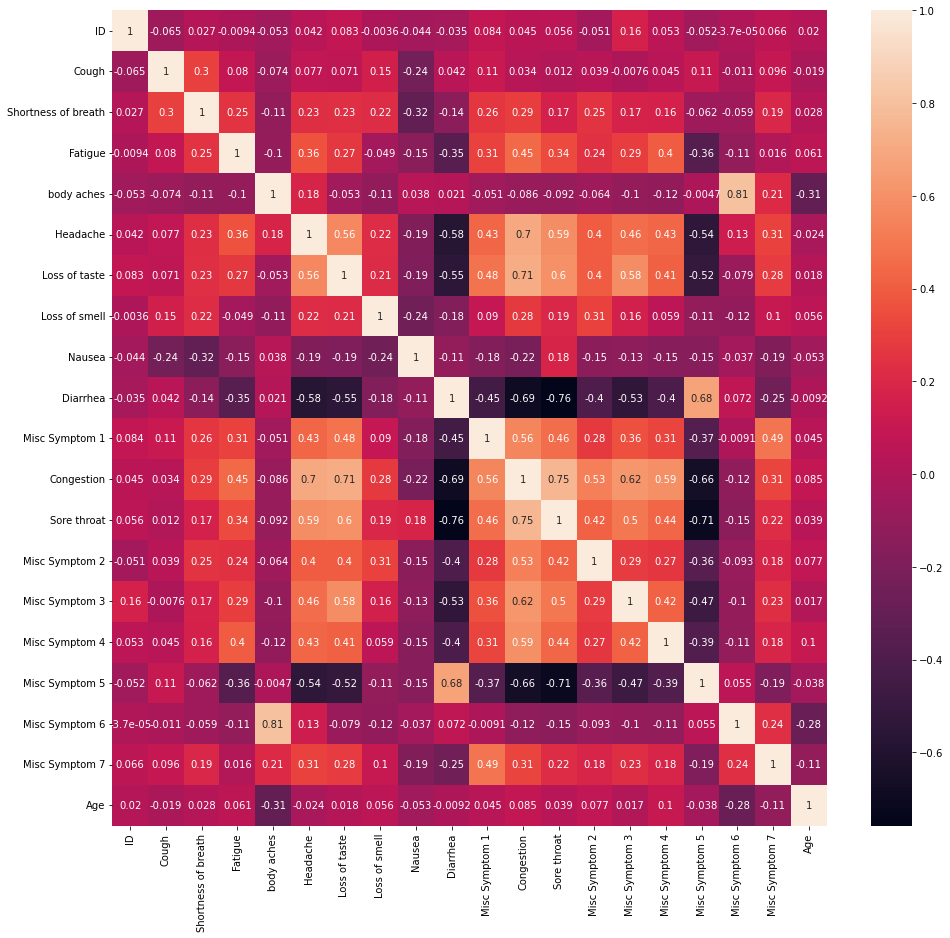

In [218]:
import seaborn as sn
plt.figure(figsize = (16,15))
sn.heatmap(corr, annot=True)
plt.show()

# DATA CLEANING AND PRE-PROCESSING

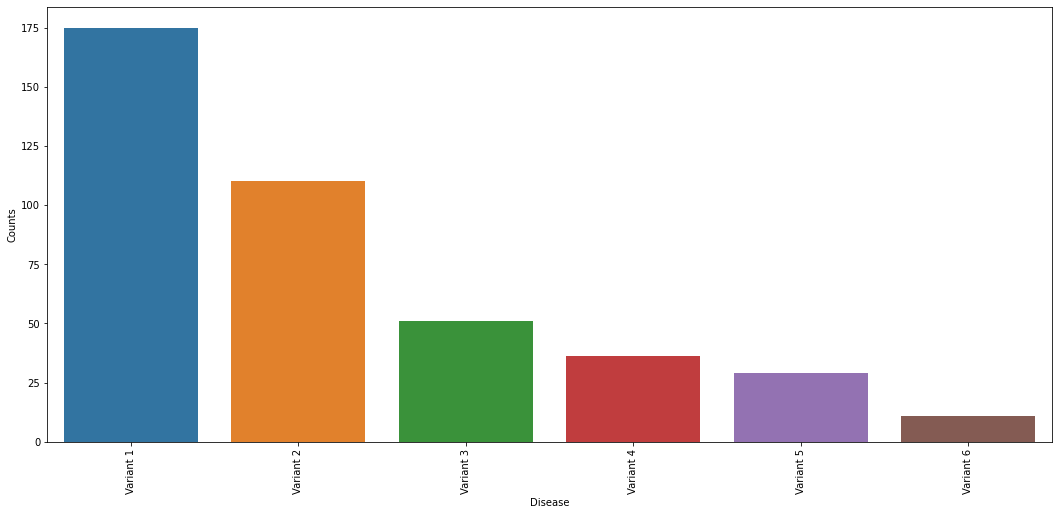

In [219]:
#data.drop(['family history'],inplace=True, axis=1)
#data.drop(['Region'],inplace=True, axis=1)
data.drop(['Pre-existing symptoms'],inplace=True,axis=1)
data.fillna(0)
data.replace(np.NaN,0)


plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

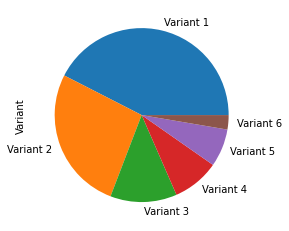

In [220]:
#calculate the percentage of each Variant category.
data.Variant.value_counts(normalize=True)

#plot the pie chart of Variant categories
data.Variant.value_counts(normalize=True).plot.pie()
plt.show()

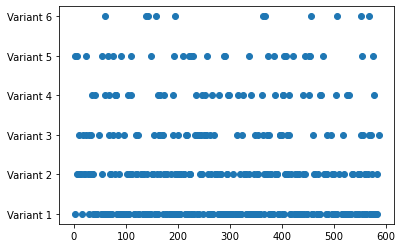

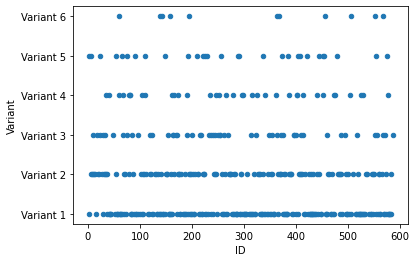

In [221]:
#plot the scatter plot of ID and Variant variable in data
plt.scatter(data.ID,data.Variant)
plt.show()

#plot the scatter plot of ID and age Variant in data
data.plot.scatter(x="ID",y="Variant")
plt.show()

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Cough'}>,
        <AxesSubplot:title={'center':'Shortness of breath'}>,
        <AxesSubplot:title={'center':'Fatigue'}>],
       [<AxesSubplot:title={'center':'body aches'}>,
        <AxesSubplot:title={'center':'Headache'}>,
        <AxesSubplot:title={'center':'Loss of taste'}>,
        <AxesSubplot:title={'center':'Loss of smell'}>],
       [<AxesSubplot:title={'center':'Nausea'}>,
        <AxesSubplot:title={'center':'Diarrhea'}>,
        <AxesSubplot:title={'center':'Misc Symptom 1'}>,
        <AxesSubplot:title={'center':'Congestion'}>],
       [<AxesSubplot:title={'center':'Sore throat'}>,
        <AxesSubplot:title={'center':'Misc Symptom 2'}>,
        <AxesSubplot:title={'center':'Misc Symptom 3'}>,
        <AxesSubplot:title={'center':'Misc Symptom 4'}>],
       [<AxesSubplot:title={'center':'Misc Symptom 5'}>,
        <AxesSubplot:title={'center':'Misc Symptom 6'}>,
        <AxesSubplot:title

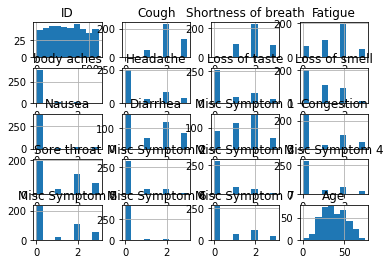

In [222]:
#Plot Histogram
data.hist()

In [223]:
data['Region'].replace(to_replace="Americas",value=1,inplace=True)
data['Region'].replace(to_replace="Europe",value=2,inplace=True)
data['Region'].replace(to_replace="East Mediterranean",value=3,inplace=True)
data['Region'].replace(to_replace="Africa",value=4,inplace=True)
data['family history'].replace(to_replace="Yes",value=1,inplace=True)
data['family history'].replace(to_replace="No",value=0,inplace=True)


In [224]:
data['Headache'] = data['Headache'].fillna(0)
data['Diarrhea'] = data['Diarrhea'].fillna(0)
data['Nausea'] = data['Nausea'].fillna(0)
data['Misc Symptom 1'] = data['Misc Symptom 1'].fillna(0)
# data['Pre-existing symptoms'] = data['Pre-existing symptoms'].fillna(0)
# data['Pre-existing symptoms'].replace(to_replace="?",value=0,inplace=True)
data.isna().sum()

ID                     0
Cough                  0
Shortness of breath    0
Fatigue                0
body aches             0
Headache               0
Loss of taste          0
family history         0
Loss of smell          0
Nausea                 0
Diarrhea               0
Misc Symptom 1         0
Congestion             0
Sore throat            0
Region                 0
Misc Symptom 2         0
Misc Symptom 3         0
Misc Symptom 4         0
Misc Symptom 5         0
Misc Symptom 6         0
Misc Symptom 7         0
Age                    0
Variant                0
dtype: int64

In [225]:
# Encoding the target value into numerical
# value using LabelEncoder"
# encoder = LabelEncoder()
# data["Variant"] = encoder.fit_transform(data["Variant"])


# MODEL BUILDING

In [226]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (329, 22), (329,)
Test: (83, 22), (83,)


In [227]:
# data['Region'].replace(to_replace="Americas",value=1,inplace=True)
# data['Region'].replace(to_replace="Europe",value=2,inplace=True)
# data['Region'].replace(to_replace="East Mediterranean",value=3,inplace=True)
# data['Region'].replace(to_replace="Africa",value=4,inplace=True)
# X_test['Region'].replace(to_replace="Americas",value=1,inplace=True)
# X_test['Region'].replace(to_replace="Europe",value=2,inplace=True)
# X_test['Region'].replace(to_replace="East Mediterranean",value=3,inplace=True)
# X_test['Region'].replace(to_replace="Africa",value=4,inplace=True)
data

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family history,Loss of smell,Nausea,...,Sore throat,Region,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Age,Variant
0,309,2,3,2,0,2.0,0,1,2,0.0,...,3,1,0,1,2,0,0,2,31,Variant 1
1,486,2,2,1,0,0.0,0,1,1,0.0,...,0,2,1,0,0,3,0,0,22,Variant 2
2,199,3,3,3,0,2.0,0,1,2,0.0,...,3,2,3,0,2,0,0,0,18,Variant 1
3,495,2,1,3,0,2.0,0,1,0,0.0,...,0,2,0,0,0,0,0,0,23,Variant 3
4,401,3,2,2,0,0.0,0,1,2,0.0,...,2,1,0,0,0,0,0,0,56,Variant 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,355,2,2,2,0,0.0,0,1,0,0.0,...,0,2,0,0,0,3,0,0,36,Variant 3
408,231,3,2,3,0,2.0,2,1,2,0.0,...,2,3,3,0,2,0,0,0,33,Variant 1
409,22,3,3,2,0,0.0,0,1,0,0.0,...,2,2,0,0,0,2,0,0,37,Variant 2
410,192,1,1,1,0,2.0,2,1,2,0.0,...,2,4,0,2,0,0,0,0,0,Variant 1


In [228]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, X, y, cv = 10,
							n_jobs = -1,
							scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [0.42857143 0.42857143 0.43902439 0.43902439 0.43902439 0.41463415
 0.41463415 0.41463415 0.41463415 0.41463415]
Mean Score: 0.42473867595818815
Gaussian NB
Scores: [0.80952381 0.71428571 0.80487805 0.87804878 0.73170732 0.80487805
 0.75609756 0.7804878  0.73170732 0.80487805]
Mean Score: 0.7816492450638791
Random Forest
Scores: [0.95238095 0.9047619  0.95121951 0.87804878 0.95121951 0.97560976
 0.97560976 0.92682927 0.90243902 0.92682927]
Mean Score: 0.9344947735191639


Accuracy on train data by SVM Classifier: 41.94528875379939
Accuracy on test data by SVM Classifier: 44.57831325301205


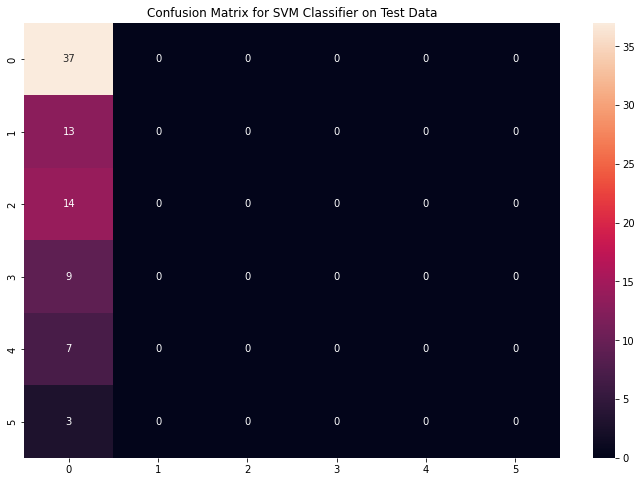

Accuracy on train data by Naive Bayes Classifier: 82.37082066869301
Accuracy on test data by Naive Bayes Classifier: 80.72289156626506


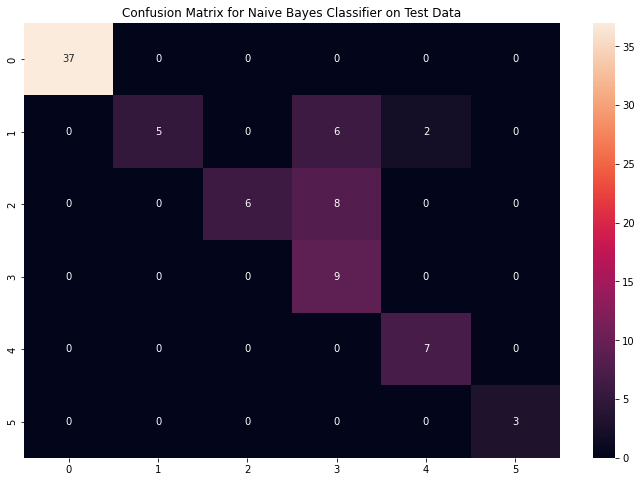

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 93.97590361445783


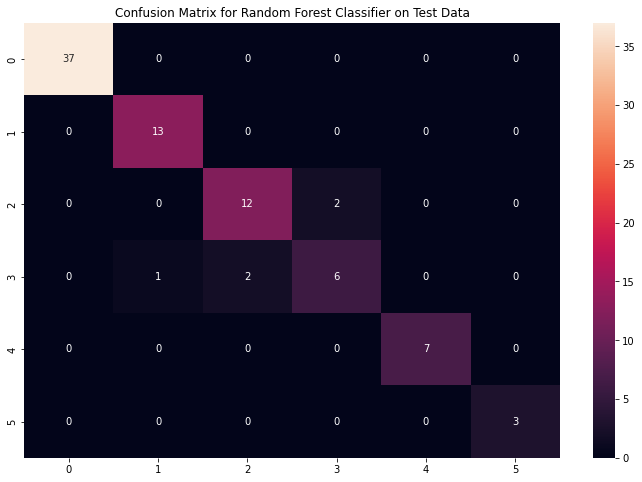

In [229]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


In [230]:
from sklearn.ensemble import GradientBoostingClassifier

Learning rate:  1
Accuracy score(training): 0.322
Accuracy on train data by Gradient Boosting Classifier: 32.21884498480243
Accuracy on test data by Gradient Boosting Classifier: 93.97590361445783


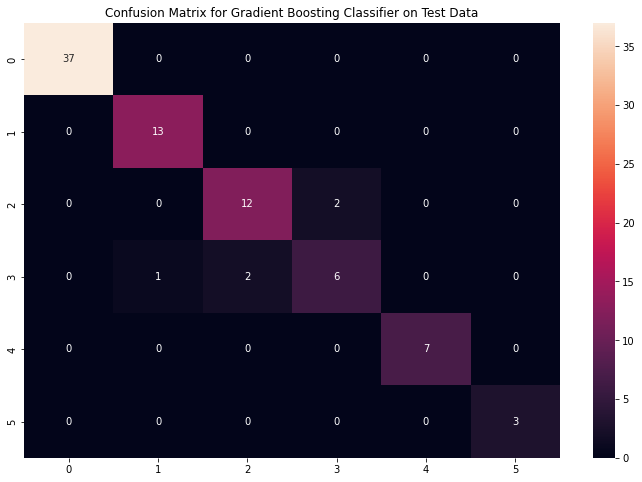

In [231]:
# Training and testing GRADIENT BOOSTING Classifier
learning_rate=1
gb_clf=GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate,max_features=2,max_depth=2,random_state=0)
gb_clf.fit(X_train, y_train)
print("Learning rate: ",learning_rate)
print("Accuracy score(training): {0:.3f}".format(gb_clf.score(X_train,y_train)))
print(f"Accuracy on train data by Gradient Boosting Classifier\
: {accuracy_score(y_train, gb_clf.predict(X_train))*100}")

print(f"Accuracy on test data by Gradient Boosting Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Gradient Boosting Classifier on Test Data")
plt.show()

In [232]:
# Training and Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
print("Accuracy score(training): {0:.3f}".format(reg.score(X_train,y_train)))
#y_pred = reg.predict(X_test)

Accuracy score(training): 0.860


/Users/aryanodugoudar/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score(training): 1.000
Accuracy on train data by Decision Tree Classifier: 100.0
Accuracy on test data by Decision Tree: 91.56626506024097


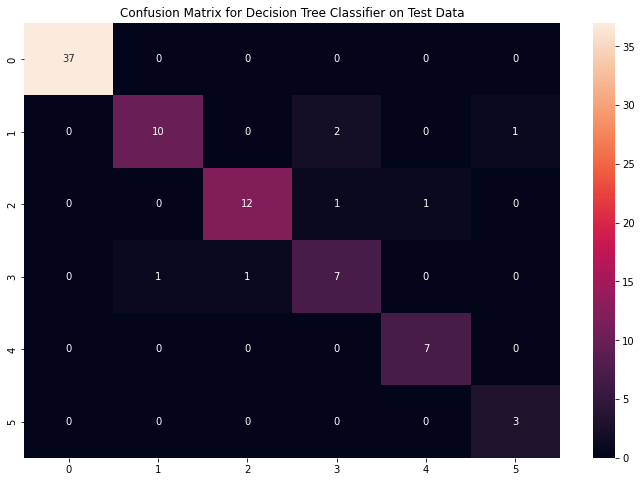

In [233]:
# Training and testing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Accuracy score(training): {0:.3f}".format(dtc.score(X_train,y_train)))
#y_pred = dtc.predict(X_test)
preds = dtc.predict(X_test)
print(f"Accuracy on train data by Decision Tree Classifier\
: {accuracy_score(y_train, dtc.predict(X_train))*100}")

print(f"Accuracy on test data by Decision Tree\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Decision Tree Classifier on Test Data")
plt.show()

In [234]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_gb_model=GradientBoostingClassifier()
final_dtc_model=DecisionTreeClassifier()
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)
final_gb_model.fit(X,y)
final_dtc_model.fit(X,y)

# Reading the test data
test_data = pd.read_csv("Test.csv")
#test_data.drop(['family history'],inplace=True, axis=1)
test_data['Region'].replace(to_replace="Americas",value=1,inplace=True)
test_data['Region'].replace(to_replace="Europe",value=2,inplace=True)
test_data['Region'].replace(to_replace="East Mediterranean",value=3,inplace=True)
test_data['Region'].replace(to_replace="Africa",value=4,inplace=True)
test_data['family history'].replace(to_replace="Yes",value=1,inplace=True)
test_data['family history'].replace(to_replace="No",value=0,inplace=True)
#test_data.drop(['Region'],inplace=True, axis=1)
# test_data['Pre-existing symptoms'] = test_data['Pre-existing symptoms'].fillna(0)
test_data.drop(['Pre-existing symptoms'],inplace=True,axis=1)
#test_data['Pre-existing symptoms'] = test_data['Pre-existing symptoms'].fillna(0)

# test_X = test_data.iloc[:, :-1]
# test_Y = encoder.fit_transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_data)
nb_preds = final_nb_model.predict(test_data)
rf_preds = final_rf_model.predict(test_data)
gb_preds=final_gb_model.predict(test_data)
dtc_preds=final_dtc_model.predict(test_data)

# final_preds = [mode([i,j,k])[0][0] for i,j,
# 			k in zip(svm_preds, nb_preds, rf_preds)]

# print(f"Accuracy on Test dataset by the combined model\
# : {accuracy_score(test_Y, final_preds)*100}")

# cf_matrix = confusion_matrix(test_Y, final_preds)
# plt.figure(figsize=(12,8))

# sns.heatmap(cf_matrix, annot = True)
# plt.title("Confusion Matrix for Combined Model on Test Dataset")
# plt.show()


In [235]:
test_data

,ID,Cough,Shortness of breath,Fatigue,body aches,Headache,Loss of taste,family history,Loss of smell,Nausea,...,Congestion,Sore throat,Region,Misc Symptom 2,Misc Symptom 3,Misc Symptom 4,Misc Symptom 5,Misc Symptom 6,Misc Symptom 7,Age
0,95,1,2,2,0,0,0,1,0,1,...,0,3,2,0,0,0,1,0,0,17
1,502,3,2,2,0,3,3,1,1,0,...,3,2,3,0,2,2,0,0,0,35
2,203,2,3,1,0,1,2,0,1,0,...,0,3,3,0,1,2,0,0,2,28
3,290,2,2,2,0,1,1,1,1,0,...,1,1,4,1,1,2,0,0,0,40
4,479,1,2,2,0,0,0,1,0,0,...,0,1,2,0,0,0,1,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,398,2,1,3,0,0,2,1,3,0,...,3,2,4,3,1,3,0,0,2,47
173,117,2,2,1,0,0,0,1,0,0,...,0,0,2,0,0,0,2,0,0,30
174,74,3,2,2,0,0,0,1,1,0,...,0,1,2,0,0,0,2,0,0,37
175,299,2,1,2,0,0,0,1,1,0,...,0,0,2,0,0,0,3,0,0,37


In [236]:
y_final=np.array(rf_preds)
y_final

array(['Variant 5', 'Variant 1', 'Variant 1', 'Variant 1', 'Variant 2',
       'Variant 1', 'Variant 1', 'Variant 5', 'Variant 5', 'Variant 3',
       'Variant 6', 'Variant 3', 'Variant 6', 'Variant 2', 'Variant 2',
       'Variant 1', 'Variant 2', 'Variant 1', 'Variant 6', 'Variant 2',
       'Variant 4', 'Variant 1', 'Variant 2', 'Variant 3', 'Variant 5',
       'Variant 1', 'Variant 2', 'Variant 2', 'Variant 1', 'Variant 1',
       'Variant 1', 'Variant 1', 'Variant 1', 'Variant 2', 'Variant 1',
       'Variant 3', 'Variant 6', 'Variant 1', 'Variant 3', 'Variant 3',
       'Variant 4', 'Variant 2', 'Variant 2', 'Variant 2', 'Variant 2',
       'Variant 3', 'Variant 5', 'Variant 5', 'Variant 6', 'Variant 2',
       'Variant 1', 'Variant 2', 'Variant 4', 'Variant 5', 'Variant 3',
       'Variant 3', 'Variant 1', 'Variant 1', 'Variant 2', 'Variant 5',
       'Variant 5', 'Variant 1', 'Variant 5', 'Variant 2', 'Variant 1',
       'Variant 1', 'Variant 2', 'Variant 2', 'Variant 1', 'Vari

In [237]:
# symptoms = X.columns.values

# # Creating a symptom index dictionary to encode the
# # input symptoms into numerical form
# symptom_index = {}
# for index, value in enumerate(symptoms):
# 	symptom = " ".join([i.capitalize() for i in value.split("_")])
# 	symptom_index[symptom] = index

# data_dict = {
# 	"symptom_index":symptom_index,
# 	"predictions_classes":encoder.classes_
# }

# # Defining the Function
# # Input: string containing symptoms separated by commmas
# # Output: Generated predictions by models
# def predictDisease(symptoms):
# 	symptoms = symptoms.split(",")
	
# 	# creating input data for the models
# 	input_data = [0] * len(data_dict["symptom_index"])
# 	for symptom in symptoms:
# 		index = data_dict["symptom_index"][symptom]
# 		input_data[index] = 1
		
# 	# reshaping the input data and converting it
# 	# into suitable format for model predictions
# 	input_data = np.array(input_data).reshape(1,-1)
	
# 	# generating individual outputs
# 	rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
# 	nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
# 	svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
	
# 	# making final prediction by taking mode of all predictions
# 	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
# 	predictions = {
# 		"rf_model_prediction": rf_prediction,
# 		"naive_bayes_prediction": nb_prediction,
# 		"svm_model_prediction": nb_prediction,
# 		"final_prediction":final_prediction
# 	}
# 	return predictions

# # Testing the function
# print(predictDisease("Cough,Shortness of breath,Fatigue"))
# data.to_csv("final.csv",index=False)

In [238]:
id = test_data[test_data.columns[0]].values.tolist()
id= np.array(id)
id

array([ 95, 502, 203, 290, 479, 478, 167, 536, 456, 147, 442, 455, 326,
       357, 513,  25, 470, 537, 310, 101, 344, 307,  19,  38,  39,  86,
       394, 303, 260, 312, 180, 373, 130, 113,  26, 319, 557, 588, 228,
       447,  90, 168, 250, 207, 213, 317,  21, 234, 407, 114, 327, 581,
       348, 271,   8, 350, 492, 510, 543,  58, 146, 540, 534, 512,  16,
       522, 368,  31, 436, 343, 416,  77, 134,  49, 107, 483, 451, 329,
       565, 514, 551, 170, 399, 210, 111, 482, 518, 263, 142, 542, 181,
       586, 505, 270, 393, 389, 476, 232,  64, 248,  98, 128, 576, 585,
       547, 239,   4,  11, 308,  89, 288, 531, 362, 477, 500, 571, 342,
       463, 419, 324, 425, 253, 238, 466,  47,  99, 493, 230, 450, 217,
       121,  51, 136, 116, 439, 527,  17, 208, 465, 508,  71, 422, 559,
       446, 382, 275, 127,   3, 277, 126, 564, 242, 151,   0,  50, 490,
       539, 189, 268,  14, 494, 184, 420, 424, 509, 183, 491,  45, 339,
        46, 360, 471, 398, 117,  74, 299,  94])

In [239]:
len(id)

177

In [240]:
len(y_final)

177

In [241]:
final = pd.DataFrame({'ID' : id,
                                'Variant' : y_final }, 
                                columns=['ID','Variant'])
final

,ID,Variant
0,95,Variant 5
1,502,Variant 1
2,203,Variant 1
3,290,Variant 1
4,479,Variant 2
...,...,...
172,398,Variant 1
173,117,Variant 3
174,74,Variant 2
175,299,Variant 2


In [242]:
final.to_csv("Final_submission4.csv", index =False)